<a href="https://colab.research.google.com/github/V-dit/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing important libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Link the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the csv as pandas dataframe
filepath = '/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Hotel Booking/Hotel Bookings.csv'
hotel_df = pd.read_csv(filepath)

In [4]:
# Viewing the data
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [5]:
hotel_df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# Inspecting the data
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From Information we get that the following columns have null values, hence first need to work on it:
'country', 'agent', 'company'

1. agent - could be null, hence we can count those customers/ bookings as direct to hotel, hence we need not omit them from the count. However, we can have a different class defined for them.
2. company - this refers to the employees belonging to a certain company. Hence, this can also be null, indicating non employee trips. These could be the self funded trips. While the others could be funded by the company.
3. country - this is a bit tricky. As, to ideally every customer must belong to a unique country. Hence we could remove the null values for the said matrix when accounted to. This data is however, very less in number, i.e. 119390 - 118902 = 488 occurences (rows) only.

In [7]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Viewing all the columns names
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# Creating a copy of the dataframe to avoid manipulation of the raw data.
df = hotel_df.copy()

In [10]:
# Getting the names of all hotels included in the data.
hotel_names = df['hotel'].unique()
print(f'The hotel names are: {hotel_names}')

The hotel names are: ['Resort Hotel' 'City Hotel']


**Basic Analysis of Agents:**

In [11]:
# Getting the list of agents in the list
agent_ids = sorted(df['agent'].dropna().unique())
print(f'The agent ids are: {agent_ids}')

# Total number of agents in the list
print(f'The total number of agents in the above list is: {len(agent_ids)}')

# How many bookings came through agents
not_by_agent = df['agent'].isna().sum()
print(f'Total bookings that came by means of agents is: {119390 - int(not_by_agent)}/119390')

The agent ids are: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 47.0, 50.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 64.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 81.0, 82.0, 83.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 103.0, 104.0, 105.0, 106.0, 107.0, 110.0, 111.0, 112.0, 114.0, 115.0, 117.0, 118.0, 119.0, 121.0, 122.0, 126.0, 127.0, 128.0, 129.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 141.0, 142.0, 143.0, 144.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 162.0, 163.0, 165.0, 167.0, 168.0, 170.0, 171.0, 173.0, 174.0, 175.0, 177.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 187.0, 191.0, 192.0, 193.0, 195.0, 196.0

**Basic Analysis of possible Company tours and/ or personal tour :**

In [12]:
# Getting the ids of all companies included in the data
company_ids = sorted(df['company'].dropna().unique())
print(f'The company ids are: {company_ids}')

# Total number of companies in the list
print(f'The total number of agents in the above list is: {len(company_ids)}')

# Total bookings that do not belong to any company
private_customers = df['company'].isna().sum()
print(f'Total {private_customers} customers do not belong to any company.')

The company ids are: [6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 28.0, 29.0, 31.0, 32.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 42.0, 43.0, 45.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 59.0, 61.0, 62.0, 64.0, 65.0, 67.0, 68.0, 71.0, 72.0, 73.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 88.0, 91.0, 92.0, 93.0, 94.0, 96.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 112.0, 113.0, 115.0, 116.0, 118.0, 120.0, 122.0, 126.0, 127.0, 130.0, 132.0, 135.0, 137.0, 139.0, 140.0, 142.0, 143.0, 144.0, 146.0, 148.0, 149.0, 150.0, 153.0, 154.0, 158.0, 159.0, 160.0, 163.0, 165.0, 167.0, 168.0, 169.0, 174.0, 178.0, 179.0, 180.0, 183.0, 184.0, 185.0, 186.0, 192.0, 193.0, 195.0, 197.0, 200.0, 202.0, 203.0, 204.0, 207.0, 209.0, 210.0, 212.0, 213.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 227.0, 229.0, 230.0, 232.0, 233.0, 234.0, 237.0, 238.0, 240.0, 242.0, 243.0, 245.0, 246.0, 250.0, 251.

**Basic Analysis of Countries:**

In [13]:
# Getting the country of origin for customers included in the data
countrywise_customer = sorted(df['country'].dropna().unique())
print(f'The customers come from these countries: {countrywise_customer}')

# Total number of countries in the list
print(f'Customers from {len(company_ids)} different countries visited these two hotels.')

The customers come from these countries: ['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 

**For each hotel, looking at the number of countries from which the customers come:**

In [14]:
# Groupby Hotel Name to get the country of origin of customers for each hotels.
grouped_hotel_country = df.groupby(['hotel'])['country']

# Get list of countires for each hotel
resort_hotel_country_list = grouped_hotel_country.get_group('Resort Hotel').unique()
city_hotel_country_list = grouped_hotel_country.get_group('City Hotel').unique()

print(f'Hotel "Resort Hotel" has got customers visiting from {len(resort_hotel_country_list)} different countries.')
print(f'Hotel "City Hotel" has got customers visiting from {len(city_hotel_country_list)} different countries.')

Hotel "Resort Hotel" has got customers visiting from 126 different countries.
Hotel "City Hotel" has got customers visiting from 167 different countries.


**Inspecting the day date and month of high traffic:**

In [15]:
# Inspecting the date/ day and month of high traffic
hotel_dates = hotel_df[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                        'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                        'adults', 'children', 'babies', 'is_repeated_guest']]
hotel_dates.head(3)

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest
0,Resort Hotel,2015,July,27,1,0,0,2,0.0,0,0
1,Resort Hotel,2015,July,27,1,0,0,2,0.0,0,0
2,Resort Hotel,2015,July,27,1,0,1,1,0.0,0,0


In [16]:
# Group the data by years, month and week number
hotel_dates.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [17]:
hotel_dates.isnull().sum()

hotel                        0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     4
babies                       0
is_repeated_guest            0
dtype: int64

In [18]:
hotel_df.shape

(119390, 32)

In [19]:
# Since this data contains null values, we need to drop those rows.
# Lets copy the original data and drop all the columns will null values.
df_nonull = hotel_df.copy()
df_nonull = df_nonull.dropna()
df_nonull.isna().sum()
df_nonull.shape

(217, 32)

In [20]:
# The above code seems to reduce the data to just (217,32). Hence, need to change the approach.
# Let us first drop the columns with the maximum number of nan values., i.e. agent and company.
df_nonull = hotel_df.copy()
df_nonull = df_nonull.drop(['agent', 'company'], axis = 1)
df_nonull.isna().sum() # The column country still contains 488 null values hence need to drop those rows.
df_nonull.shape # The shape of (119390,30) is retained

(119390, 30)

In [21]:
# Dropping the 488 rows containing NaN values in the 'country' column.
df_nonull = df_nonull.dropna()
df_nonull.shape
# From this it came to my notice that 4 additional rows got deleted. This is because the column children contained 4 NaN values.

(118898, 30)

In [22]:
# Now, let us continue with the task.
# 1. Need to groupby the data wrt to hotel and country.
hotel_country = df_nonull.groupby(['hotel'])['country']
hotel_country.describe()

,count,unique,top,freq
hotel,,,,
City Hotel,79302,166,PRT,30956
Resort Hotel,39596,125,PRT,17630


In [23]:
type(hotel_country)

pandas.core.groupby.generic.SeriesGroupBy

In [24]:
len(hotel_country)

2

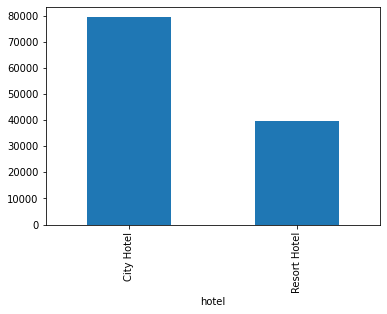

In [25]:
# Plotting Bar chart for hotel
df_nonull.groupby(['hotel']).size().plot(kind = "bar")

([<matplotlib.patches.Wedge at 0x7ff3a1de2e50>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(0.9520945438510592, 0.5509228435716237, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.5193242966460322, 0.3005033692208856, '33.3%')])

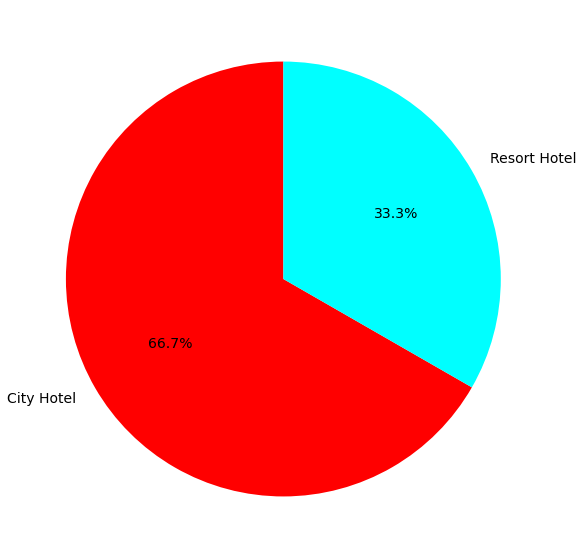

In [26]:
# Plotting the data in pie chart as the bar chart doesn't quite well represent this.
plt.rcParams['figure.figsize'] = 10,10
labels = df_nonull['hotel'].value_counts().index.tolist()
sizes = df_nonull['hotel'].value_counts().tolist()
# explode = (0, 0.01)
colors = ['red','cyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

In [27]:
# 2. Need to groupby the data wrt to hotel and adults, children.
hotel_family = df_nonull.groupby(['hotel'])['adults', 'children','babies']
hotel_family.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


adults                                               children  \
                count      mean       std  min  25%  50%  75%   max    count   
hotel                                                                          
City Hotel    79302.0  1.851126  0.509013  0.0  2.0  2.0  2.0   4.0  79302.0   
Resort Hotel  39596.0  1.872942  0.697112  0.0  2.0  2.0  2.0  55.0  39596.0   

                        ...              babies                                \
                  mean  ...  75%   max    count      mean       std  min  25%   
hotel                   ...                                                     
City Hotel    0.091397  ...  0.0   3.0  79302.0  0.004943  0.084338  0.0  0.0   
Resort Hotel  0.129862  ...  0.0  10.0  39596.0  0.013966  0.119061  0.0  0.0   

                              
              50%  75%   max  
hotel                         
City Hotel    0.0  0.0  10.0  
Resort Hotel  0.0  0.0   2.0  

[2 rows x 24 columns]

From the above it is clear that the way I have grouped by the data for adults, children and babies is a bit risky. So, we need to group it individually or may be convert this to a list.

In [86]:
hotel_adults = df_nonull.groupby(['hotel'])['adults']
hotel_adults.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [28]:
hotel_adults = df_nonull.groupby(['hotel'])['adults']
hotel_adults.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [111]:
hotel_adults1 = df_nonull.groupby(['hotel'])['adults']
type(hotel_adults1)
# hotel_adults1.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

pandas.core.groupby.generic.SeriesGroupBy

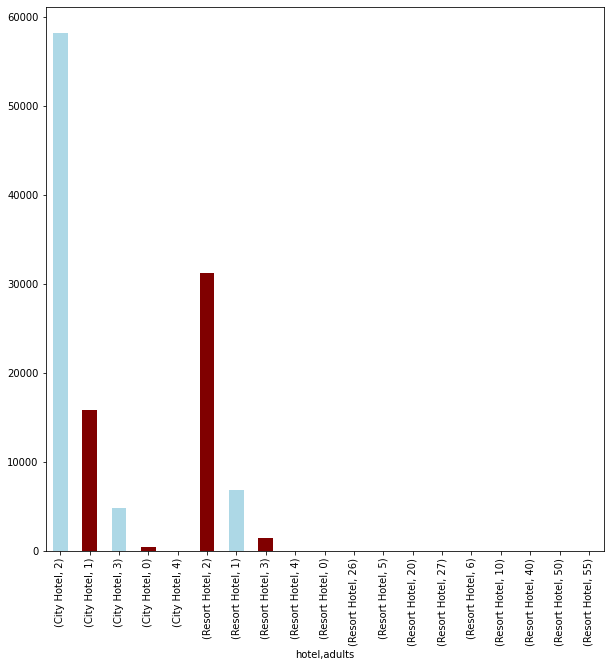

In [103]:
# Plotting the data for adults based on the number of adults per booking.
hotel_adults.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

In [29]:
hotel_children = df_nonull.groupby(['hotel'])['children']
hotel_children.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


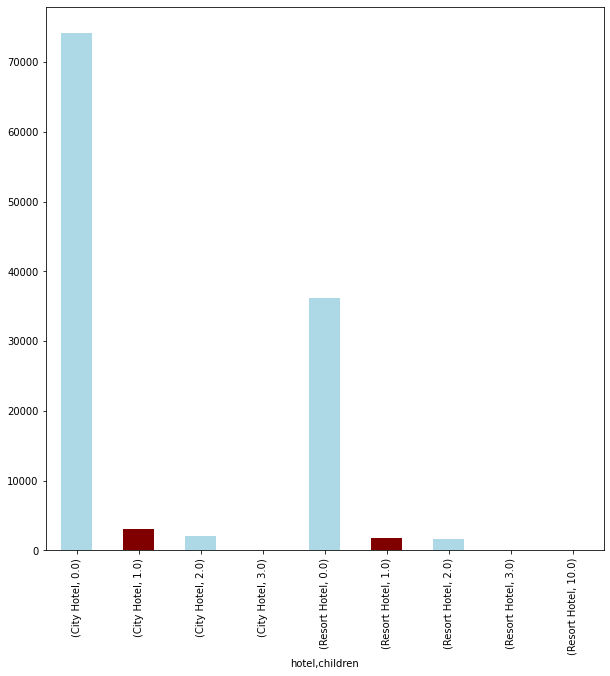

In [104]:
# Plotting the data for adults based on the number of children per booking.
hotel_children.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

In [30]:
hotel_babies = df_nonull.groupby(['hotel'])['babies']
hotel_babies.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.004943,0.084338,0.0,0.0,0.0,0.0,10.0
Resort Hotel,39596.0,0.013966,0.119061,0.0,0.0,0.0,0.0,2.0


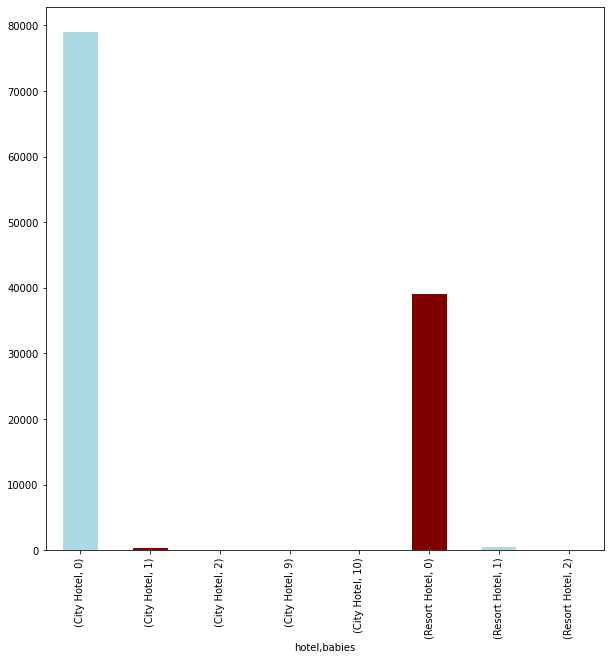

In [105]:
# Plotting the data for adults based on the number of babies per booking.
hotel_babies.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

The above bar chart is a bit off to visualize the data. Hence, need to plot a different type of graph which might be self explanatory.

**Now, let's have a look at the cancelled booking.**

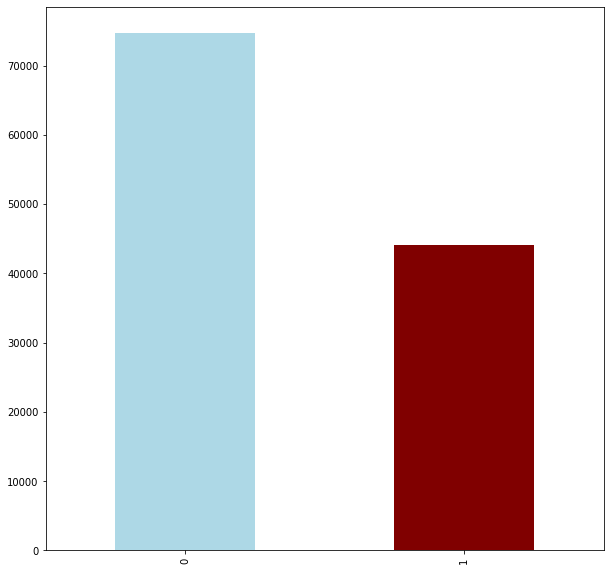

In [31]:
# Analysing the cancelled bookings:
cancellation_data = df_nonull['is_canceled']
cancellation_data

# Plotting the count plot of this using seaborn's count plot feature
cancellation_data.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])

# Here, 0 means Not Cancelled while 1 means Cancelled.

From the above graph it is evident that the about 4000+ bookings were cancelled. We can not plot a pie chart to view the percentage of it as well.

([<matplotlib.patches.Wedge at 0x7ff39fd94e50>,
 [Text(-1.0113763824572926, -0.4325711652521476, 'Not Cancelled'),
  Text(1.1033196457713303, 0.47189591993894836, 'Cancelled')],
 [Text(-0.551659844976705, -0.23594790831935322, '62.9%'),
  Text(0.6436031266999426, 0.2752726199643865, '37.1%')])

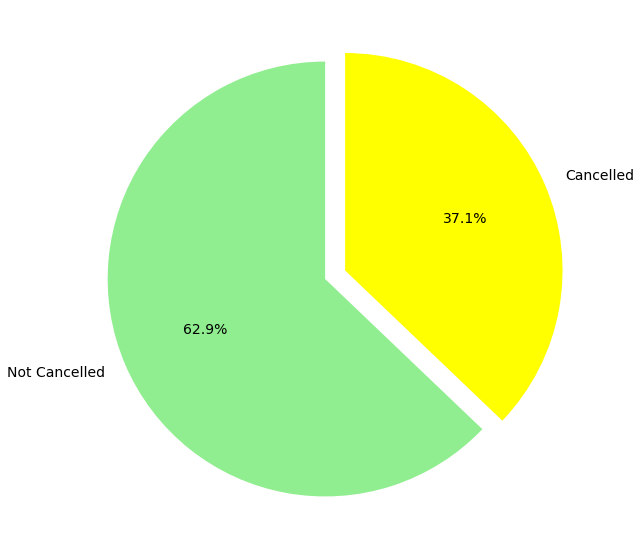

In [37]:
# Plotting the pie chart to view percentage of cancellation.
plt.rcParams['figure.figsize'] = 10,10
labels = ['Not Cancelled', 'Cancelled']
sizes = cancellation_data.value_counts().tolist()
explode = [0,0.1]
colors = ['lightgreen','yellow']
plt.pie(sizes, labels = labels, colors=colors, explode = explode, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

So, this indicates that 37.1 % of the bookings were cancelled.
Note: Here we have replaced the values of 0 and 1 by Cancelled and Not Cancelled. This is done manually at the graph level. In case of change in order by mistake, it would be misleading. Hence, it is preferable to replace the values of 0 and 1 by the respective values.

To further this, we can have a look at the cancellation for individual hotels. Hence, group by the data and complete the task.

In [33]:
# Analysing the data for individual hotels
cancellation_data_hotelwise = df_nonull.groupby(['hotel'])['is_canceled']
cancellation_data_hotelwise.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.417089,0.493081,0.0,0.0,0.0,1.0,1.0
Resort Hotel,39596.0,0.279750,0.448882,0.0,0.0,0.0,1.0,1.0


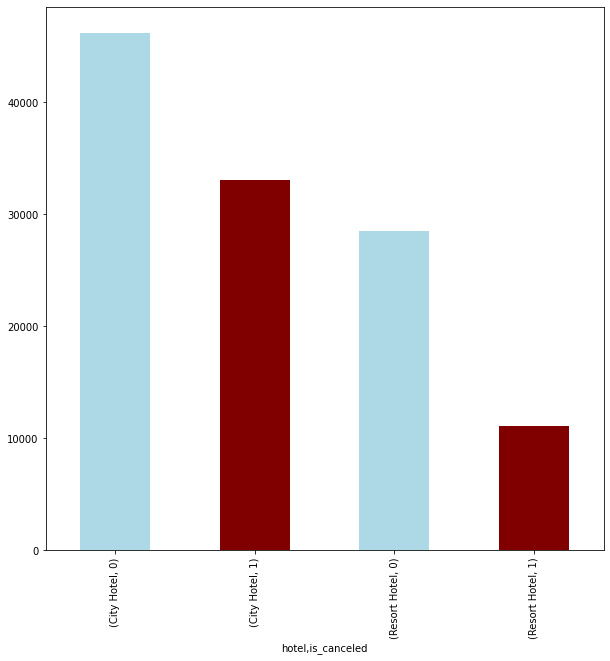

In [42]:
cancellation_data_hotelwise.value_counts().plot(kind = 'bar', color = ['lightblue', 'maroon'])
# Here, we need to replace the value of 0 and 1 by not - çancelled and cancelled respectively.
# This might be difficult with the groupby function hence, may be we can make a list of these two columns and proceed.